In [119]:
import numpy as np
import pandas as pd

from sklearn import metrics,cluster 
from umap import UMAP
import multiscale_phate as mp

import scanpy as sc
import scprep

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
data_ln_sqrt = pd.read_csv("data_ln_sqrt_scale09.csv",index_col=0)
data_group = pd.read_csv("group_scale09.csv",index_col=0).values.reshape(-1)

In [3]:
set(data_group)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [4]:
n_groups = 10

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Anaconda3\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
C:\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


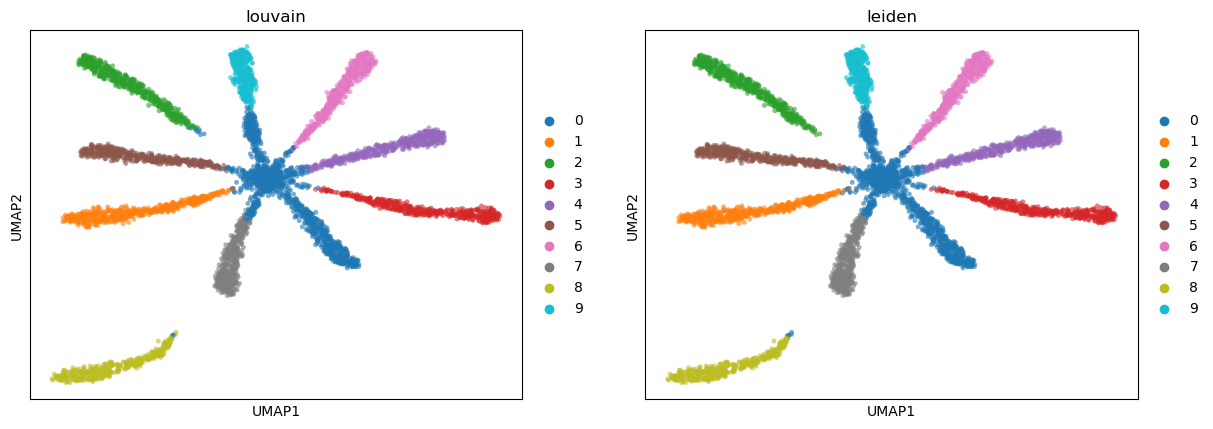

leiden: 0.6816238671315692 0.8284866587239758
louvain: 0.6780111403037525 0.8270768752757922


In [5]:
adata = sc.AnnData(data_ln_sqrt)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution=0.1, use_weights=True)
sc.tl.louvain(adata,resolution=0.1, use_weights=True)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain', 'leiden'], s=50, alpha=0.6, ncols=2)

leiden_group = np.array(adata.obs['leiden'].values).astype('int')
ari_leiden = metrics.adjusted_rand_score(leiden_group, data_group)
ami_leiden = metrics.adjusted_mutual_info_score(leiden_group, data_group)

louvain_group = np.array(adata.obs['louvain'].values).astype('int')
ari_louvain = metrics.adjusted_rand_score(louvain_group, data_group)
ami_louvain = metrics.adjusted_mutual_info_score(louvain_group, data_group)

print("leiden:",ari_leiden,ami_leiden)
print("louvain:",ari_louvain,ami_louvain)

In [6]:
agglo_instance = cluster.AgglomerativeClustering(n_clusters=n_groups).fit(data_ln_sqrt)
agglo_groups = agglo_instance.labels_
ari_agglo = metrics.adjusted_rand_score(agglo_groups, data_group)
ami_agglo = metrics.adjusted_mutual_info_score(agglo_groups, data_group)

print("hierarchical:",ari_agglo,ami_agglo)

hierarchical: 0.5293578582089171 0.7688619052865945


In [7]:
mp_op = mp.Multiscale_PHATE(random_state=0)
levels = mp_op.fit(data_ln_sqrt)
levels

Calculating Multiscale PHATE tree...
  Calculating PCA...
  Calculated PCA in 0.60 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 7.98 seconds.
  Setting epsilon to 2.2857
  Setting merge threshold to 0.0887
  Calculating condensation...
  Calculated condensation in 5.10 seconds.
Calculated Multiscale PHATE tree in 13.98 seconds.
Computing gradient...
Identifying salient levels of resolution...


[0, 8, 11, 69, 88, 101, 104, 128, 147, 153, 165]

In [8]:
mp_embedding, mp_clusters, mp_sizes = mp_op.transform(visualization_level = 0,cluster_level = 153)
set(mp_clusters)

{0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 14, 15, 16, 24, 47, 53, 127, 189}

In [9]:
ari_mp = metrics.adjusted_rand_score(mp_clusters, data_group)
ami_mp = metrics.adjusted_mutual_info_score(mp_clusters, data_group)
print("Multiscale PHATE:",ari_mp,ami_mp)

Multiscale PHATE: 0.526590717188427 0.7609218978656752


In [10]:
from dtne import *

In [11]:
embedding = DTNE(k_neighbors = 5) 
Y = embedding.fit_transform(data_ln_sqrt)
dtne_cluster = embedding.cluster_cells(n_clusters=n_groups)

In [12]:
ari_dtne = metrics.adjusted_rand_score(dtne_cluster, data_group)
ami_dtne = metrics.adjusted_mutual_info_score(dtne_cluster, data_group)
print("dtne:",ari_dtne,ami_dtne)

dtne: 0.7262004230774797 0.8425378859509313


In [101]:
data_ln_sqrt = pd.read_csv("data_ln_sqrt_scale08.csv",index_col=0)
data_group = pd.read_csv("group_scale08.csv",index_col=0).values.reshape(-1)
set(data_group)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Anaconda3\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


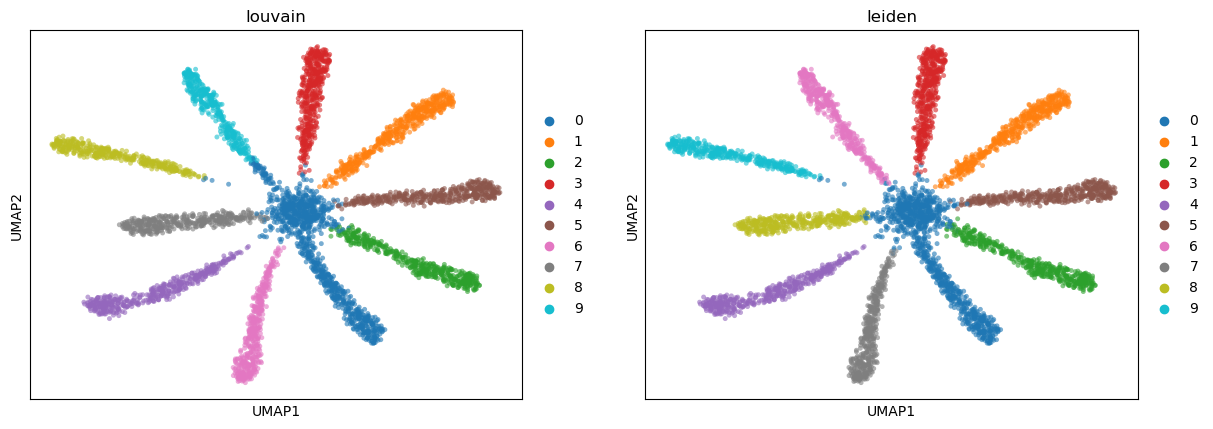

leiden: 0.7455482103572637 0.8498436657107827
louvain: 0.7293645579872678 0.843574802869191


In [14]:
adata = sc.AnnData(data_ln_sqrt)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution=0.2, use_weights=True)
sc.tl.louvain(adata,resolution=0.2, use_weights=True)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain', 'leiden'], s=50, alpha=0.6, ncols=2)

leiden_group = np.array(adata.obs['leiden'].values).astype('int')
ari_leiden = metrics.adjusted_rand_score(leiden_group, data_group)
ami_leiden = metrics.adjusted_mutual_info_score(leiden_group, data_group)

louvain_group = np.array(adata.obs['louvain'].values).astype('int')
ari_louvain = metrics.adjusted_rand_score(louvain_group, data_group)
ami_louvain = metrics.adjusted_mutual_info_score(louvain_group, data_group)

print("leiden:",ari_leiden,ami_leiden)
print("louvain:",ari_louvain,ami_louvain)

In [15]:
agglo_instance = cluster.AgglomerativeClustering(n_clusters=n_groups).fit(data_ln_sqrt)
agglo_groups = agglo_instance.labels_
ari_agglo = metrics.adjusted_rand_score(agglo_groups, data_group)
ami_agglo = metrics.adjusted_mutual_info_score(agglo_groups, data_group)

print("hierarchical:",ari_agglo,ami_agglo)

hierarchical: 0.5522796523998638 0.774392166236141


In [16]:
mp_op = mp.Multiscale_PHATE(random_state=0)
levels = mp_op.fit(data_ln_sqrt)
levels

Calculating Multiscale PHATE tree...
  Calculating PCA...
  Calculated PCA in 0.60 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 9.05 seconds.
  Setting epsilon to 0.8864
  Setting merge threshold to 0.0095
  Calculating condensation...
  Calculated condensation in 4.02 seconds.
Calculated Multiscale PHATE tree in 13.97 seconds.
Computing gradient...
Identifying salient levels of resolution...


[0, 8, 13, 19, 56, 59, 64, 73, 83, 93, 108, 117, 149, 153, 158, 175, 181]

In [17]:
mp_embedding, mp_clusters, mp_sizes = mp_op.transform(visualization_level = 0,cluster_level = 158)
set(mp_clusters)

{0, 1, 4, 8, 10, 12, 14, 15, 16, 32, 38, 39}

In [18]:
ari_mp = metrics.adjusted_rand_score(mp_clusters, data_group)
ami_mp = metrics.adjusted_mutual_info_score(mp_clusters, data_group)
print("Multiscale PHATE:",ari_mp,ami_mp)

Multiscale PHATE: 0.28004933726101133 0.6511058785560149


In [111]:
embedding = DTNE(k_neighbors = 30) 
Y = embedding.fit_transform(data_ln_sqrt)
dtne_cluster = embedding.cluster_cells(n_clusters=n_groups)

ari_dtne = metrics.adjusted_rand_score(dtne_cluster, data_group)
ami_dtne = metrics.adjusted_mutual_info_score(dtne_cluster, data_group)
print("dtne:",ari_dtne,ami_dtne)

dtne: 0.6657491797307848 0.8161750666110785


In [90]:
data_ln_sqrt = pd.read_csv("data_ln_sqrt_scale07.csv",index_col=0)
data_group = pd.read_csv("group_scale07.csv",index_col=0).values.reshape(-1)
set(data_group)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Anaconda3\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


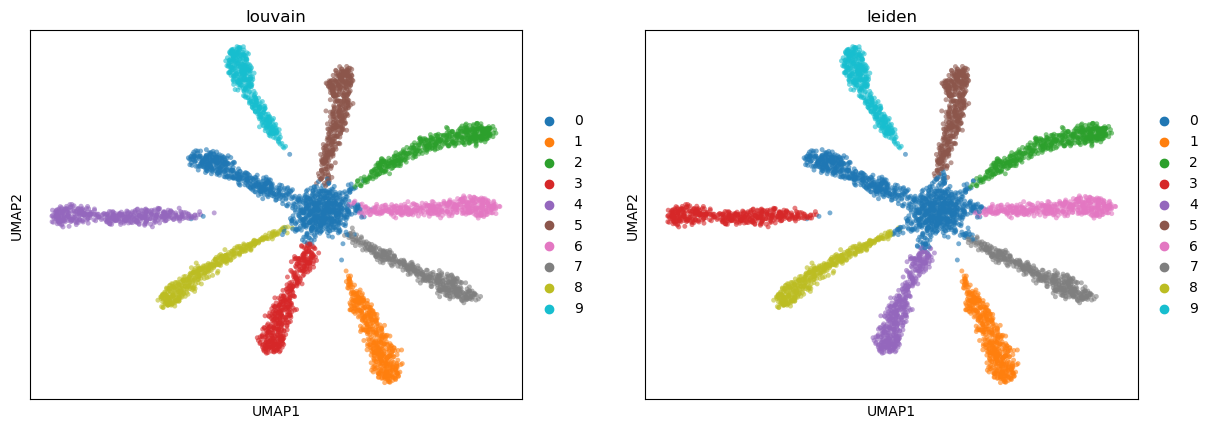

leiden: 0.7045434573929608 0.8323478678315456
louvain: 0.7389597343646142 0.8463841502203483


In [22]:
adata = sc.AnnData(data_ln_sqrt)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution=0.2, use_weights=True)
sc.tl.louvain(adata,resolution=0.2, use_weights=True)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain', 'leiden'], s=50, alpha=0.6, ncols=2)

leiden_group = np.array(adata.obs['leiden'].values).astype('int')
ari_leiden = metrics.adjusted_rand_score(leiden_group, data_group)
ami_leiden = metrics.adjusted_mutual_info_score(leiden_group, data_group)

louvain_group = np.array(adata.obs['louvain'].values).astype('int')
ari_louvain = metrics.adjusted_rand_score(louvain_group, data_group)
ami_louvain = metrics.adjusted_mutual_info_score(louvain_group, data_group)

print("leiden:",ari_leiden,ami_leiden)
print("louvain:",ari_louvain,ami_louvain)

In [23]:
agglo_instance = cluster.AgglomerativeClustering(n_clusters=n_groups).fit(data_ln_sqrt)
agglo_groups = agglo_instance.labels_
ari_agglo = metrics.adjusted_rand_score(agglo_groups, data_group)
ami_agglo = metrics.adjusted_mutual_info_score(agglo_groups, data_group)

print("hierarchical:",ari_agglo,ami_agglo)

hierarchical: 0.5399520936390518 0.7641048062279342


In [24]:
mp_op = mp.Multiscale_PHATE(random_state=0)
levels = mp_op.fit(data_ln_sqrt)
levels

Calculating Multiscale PHATE tree...
  Calculating PCA...
  Calculated PCA in 0.62 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 8.72 seconds.
  Setting epsilon to 2.2244
  Setting merge threshold to 0.1328
  Calculating condensation...
  Calculated condensation in 7.60 seconds.
Calculated Multiscale PHATE tree in 17.27 seconds.
Computing gradient...
Identifying salient levels of resolution...


[0, 9, 11, 84, 89, 93, 103, 108, 134, 140, 158, 163]

In [25]:
mp_embedding, mp_clusters, mp_sizes = mp_op.transform(visualization_level = 0,cluster_level = 163)
set(mp_clusters)

{0, 1, 2, 3, 4, 8, 10, 12, 14, 15, 16}

In [26]:
ari_mp = metrics.adjusted_rand_score(mp_clusters, data_group)
ami_mp = metrics.adjusted_mutual_info_score(mp_clusters, data_group)
print("Multiscale PHATE:",ari_mp,ami_mp)

Multiscale PHATE: 0.308418499913418 0.6628785508382081


In [100]:
embedding = DTNE(k_neighbors = 5, l1=2) 
Y = embedding.fit_transform(data_ln_sqrt)
dtne_cluster = embedding.cluster_cells(n_clusters=n_groups)

ari_dtne = metrics.adjusted_rand_score(dtne_cluster, data_group)
ami_dtne = metrics.adjusted_mutual_info_score(dtne_cluster, data_group)
print("dtne:",ari_dtne,ami_dtne)

dtne: 0.7056289198930109 0.8303410442469201


In [28]:
data_ln_sqrt = pd.read_csv("data_ln_sqrt_scale06.csv",index_col=0)
data_group = pd.read_csv("group_scale06.csv",index_col=0).values.reshape(-1)
set(data_group)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Anaconda3\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


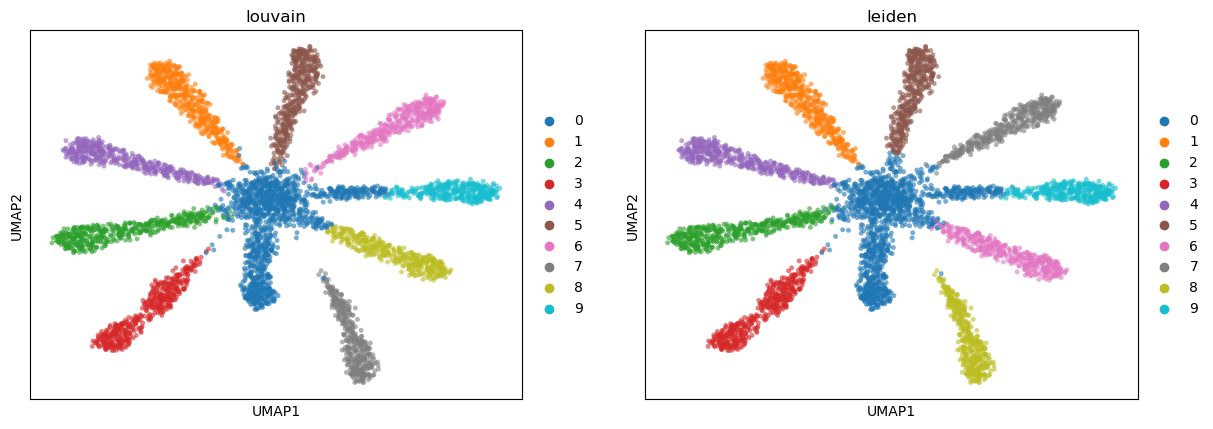

leiden: 0.6117952718874574 0.7980250209321118
louvain: 0.6247107426358444 0.803094568847868


In [29]:
adata = sc.AnnData(data_ln_sqrt)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution=0.2, use_weights=True)
sc.tl.louvain(adata,resolution=0.2, use_weights=True)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain', 'leiden'], s=50, alpha=0.6, ncols=2)

leiden_group = np.array(adata.obs['leiden'].values).astype('int')
ari_leiden = metrics.adjusted_rand_score(leiden_group, data_group)
ami_leiden = metrics.adjusted_mutual_info_score(leiden_group, data_group)

louvain_group = np.array(adata.obs['louvain'].values).astype('int')
ari_louvain = metrics.adjusted_rand_score(louvain_group, data_group)
ami_louvain = metrics.adjusted_mutual_info_score(louvain_group, data_group)

print("leiden:",ari_leiden,ami_leiden)
print("louvain:",ari_louvain,ami_louvain)

In [30]:
embedding = DTNE(k_neighbors = 10,l1=5) 
Y = embedding.fit_transform(data_ln_sqrt)
dtne_cluster = embedding.cluster_cells(n_clusters=n_groups)

ari_dtne = metrics.adjusted_rand_score(dtne_cluster, data_group)
ami_dtne = metrics.adjusted_mutual_info_score(dtne_cluster, data_group)
print("dtne:",ari_dtne,ami_dtne)

dtne: 0.6353412966557063 0.8042036941393826


In [31]:
agglo_instance = cluster.AgglomerativeClustering(n_clusters=n_groups).fit(data_ln_sqrt)
agglo_groups = agglo_instance.labels_
ari_agglo = metrics.adjusted_rand_score(agglo_groups, data_group)
ami_agglo = metrics.adjusted_mutual_info_score(agglo_groups, data_group)

print("hierarchical:",ari_agglo,ami_agglo)

hierarchical: 0.5264213361355587 0.7491105078675604


In [32]:
mp_op = mp.Multiscale_PHATE(random_state=0)
levels = mp_op.fit(data_ln_sqrt)
levels

Calculating Multiscale PHATE tree...
  Calculating PCA...
  Calculated PCA in 0.62 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 9.03 seconds.
  Setting epsilon to 2.1094
  Setting merge threshold to 0.1341
  Calculating condensation...
  Calculated condensation in 7.10 seconds.
Calculated Multiscale PHATE tree in 17.06 seconds.
Computing gradient...
Identifying salient levels of resolution...


[0, 8, 13, 65, 86, 90, 93, 108, 147, 153, 161]

In [33]:
mp_embedding, mp_clusters, mp_sizes = mp_op.transform(visualization_level = 0,cluster_level = 161)
set(mp_clusters)

{0, 1, 2, 3, 4, 8, 10, 12, 14, 15, 16}

In [34]:
ari_mp = metrics.adjusted_rand_score(mp_clusters, data_group)
ami_mp = metrics.adjusted_mutual_info_score(mp_clusters, data_group)
print("Multiscale PHATE:",ari_mp,ami_mp)

Multiscale PHATE: 0.29299502356061385 0.6546461696202414


In [35]:
data_ln_sqrt = pd.read_csv("data_ln_sqrt_scale05.csv",index_col=0)
data_group = pd.read_csv("group_scale05.csv",index_col=0).values.reshape(-1)
set(data_group)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Anaconda3\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


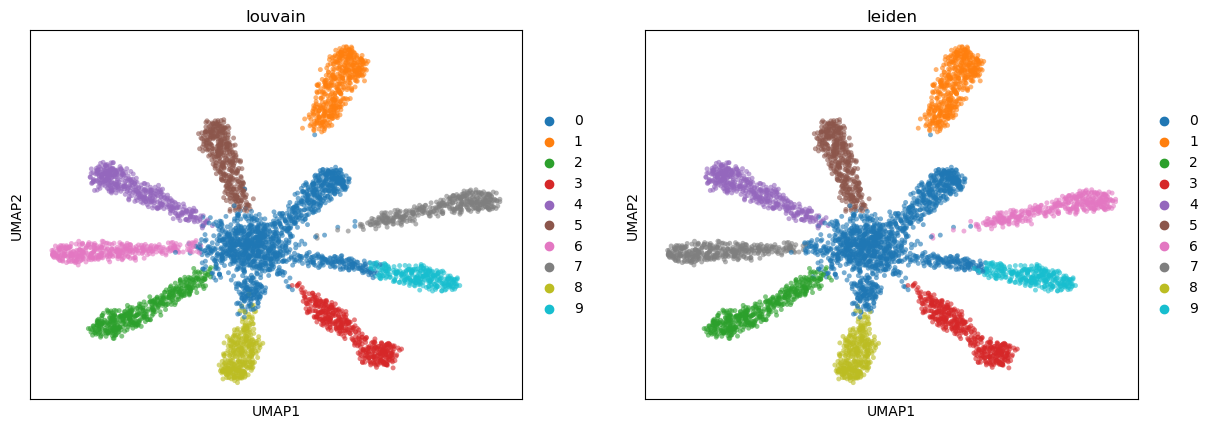

leiden: 0.544110741505337 0.7709374472776672
louvain: 0.5476881273794222 0.7726281883655636


In [36]:
adata = sc.AnnData(data_ln_sqrt)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution=0.2, use_weights=True)
sc.tl.louvain(adata,resolution=0.2, use_weights=True)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain', 'leiden'], s=50, alpha=0.6, ncols=2)

leiden_group = np.array(adata.obs['leiden'].values).astype('int')
ari_leiden = metrics.adjusted_rand_score(leiden_group, data_group)
ami_leiden = metrics.adjusted_mutual_info_score(leiden_group, data_group)

louvain_group = np.array(adata.obs['louvain'].values).astype('int')
ari_louvain = metrics.adjusted_rand_score(louvain_group, data_group)
ami_louvain = metrics.adjusted_mutual_info_score(louvain_group, data_group)

print("leiden:",ari_leiden,ami_leiden)
print("louvain:",ari_louvain,ami_louvain)

In [37]:
embedding = DTNE(k_neighbors = 10) 
Y = embedding.fit_transform(data_ln_sqrt)
dtne_cluster = embedding.cluster_cells(n_clusters=n_groups)

ari_dtne = metrics.adjusted_rand_score(dtne_cluster, data_group)
ami_dtne = metrics.adjusted_mutual_info_score(dtne_cluster, data_group)
print("dtne:",ari_dtne,ami_dtne)

dtne: 0.5804385976338687 0.7857834039522895


In [38]:
agglo_instance = cluster.AgglomerativeClustering(n_clusters=n_groups).fit(data_ln_sqrt)
agglo_groups = agglo_instance.labels_
ari_agglo = metrics.adjusted_rand_score(agglo_groups, data_group)
ami_agglo = metrics.adjusted_mutual_info_score(agglo_groups, data_group)

print("hierarchical:",ari_agglo,ami_agglo)

hierarchical: 0.5741026026436321 0.7609490115640939


In [39]:
mp_op = mp.Multiscale_PHATE(random_state=0)
levels = mp_op.fit(data_ln_sqrt)
levels

Calculating Multiscale PHATE tree...
  Calculating PCA...
  Calculated PCA in 0.65 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 10.22 seconds.
  Setting epsilon to 0.4216
  Setting merge threshold to 0.0057
  Calculating condensation...
  Calculated condensation in 5.19 seconds.
Calculated Multiscale PHATE tree in 16.39 seconds.
Computing gradient...
Identifying salient levels of resolution...


[0,
 9,
 40,
 42,
 57,
 59,
 67,
 97,
 105,
 115,
 122,
 131,
 138,
 141,
 150,
 154,
 159,
 177]

In [40]:
mp_embedding, mp_clusters, mp_sizes = mp_op.transform(visualization_level = 0,cluster_level = 154)
set(mp_clusters)

{0, 1, 2, 3, 4, 8, 10, 12, 15, 16, 127}

In [41]:
ari_mp = metrics.adjusted_rand_score(mp_clusters, data_group)
ami_mp = metrics.adjusted_mutual_info_score(mp_clusters, data_group)
print("Multiscale PHATE:",ari_mp,ami_mp)

Multiscale PHATE: 0.5058450664206251 0.7519329950235553


In [42]:
data_ln_sqrt = pd.read_csv("data_ln_sqrt_scale04.csv",index_col=0)
data_group = pd.read_csv("group_scale04.csv",index_col=0).values.reshape(-1)
set(data_group)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Anaconda3\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


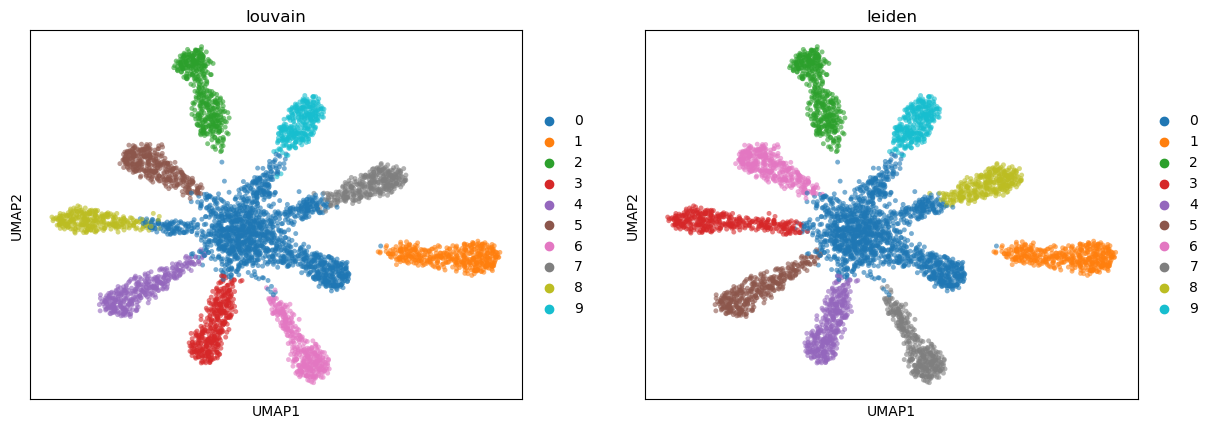

leiden: 0.49870287134257135 0.7528968920370444
louvain: 0.460698601288006 0.7363142279796132


In [43]:
adata = sc.AnnData(data_ln_sqrt)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution=0.2, use_weights=True)
sc.tl.louvain(adata,resolution=0.2, use_weights=True)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain', 'leiden'], s=50, alpha=0.6, ncols=2)

leiden_group = np.array(adata.obs['leiden'].values).astype('int')
ari_leiden = metrics.adjusted_rand_score(leiden_group, data_group)
ami_leiden = metrics.adjusted_mutual_info_score(leiden_group, data_group)

louvain_group = np.array(adata.obs['louvain'].values).astype('int')
ari_louvain = metrics.adjusted_rand_score(louvain_group, data_group)
ami_louvain = metrics.adjusted_mutual_info_score(louvain_group, data_group)

print("leiden:",ari_leiden,ami_leiden)
print("louvain:",ari_louvain,ami_louvain)

In [44]:
embedding = DTNE(k_neighbors = 10) 
Y = embedding.fit_transform(data_ln_sqrt)
dtne_cluster = embedding.cluster_cells(n_clusters=n_groups)

ari_dtne = metrics.adjusted_rand_score(dtne_cluster, data_group)
ami_dtne = metrics.adjusted_mutual_info_score(dtne_cluster, data_group)
print("dtne:",ari_dtne,ami_dtne)

dtne: 0.5294682027964074 0.7645627986905548


In [45]:
agglo_instance = cluster.AgglomerativeClustering(n_clusters=n_groups).fit(data_ln_sqrt)
agglo_groups = agglo_instance.labels_
ari_agglo = metrics.adjusted_rand_score(agglo_groups, data_group)
ami_agglo = metrics.adjusted_mutual_info_score(agglo_groups, data_group)

print("hierarchical:",ari_agglo,ami_agglo)

hierarchical: 0.5054236341568012 0.728946546489369


In [46]:
mp_op = mp.Multiscale_PHATE(random_state=0)
levels = mp_op.fit(data_ln_sqrt)
levels

Calculating Multiscale PHATE tree...
  Calculating PCA...
  Calculated PCA in 0.60 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 9.32 seconds.
  Setting epsilon to 1.5856
  Setting merge threshold to 0.4249
  Calculating condensation...
  Calculated condensation in 11.73 seconds.
Calculated Multiscale PHATE tree in 21.95 seconds.
Computing gradient...
Identifying salient levels of resolution...


[0, 6, 10, 12, 79, 89, 94, 106, 118, 128, 144, 149, 160, 165, 171, 174]

In [47]:
mp_embedding, mp_clusters, mp_sizes = mp_op.transform(visualization_level = 0,cluster_level = 154)
set(mp_clusters)

{0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 31, 38, 110}

In [48]:
ari_mp = metrics.adjusted_rand_score(mp_clusters, data_group)
ami_mp = metrics.adjusted_mutual_info_score(mp_clusters, data_group)
print("Multiscale PHATE:",ari_mp,ami_mp)

Multiscale PHATE: 0.3055730402872359 0.6742522558982693


In [49]:
data_ln_sqrt = pd.read_csv("data_ln_sqrt_scale03.csv",index_col=0)
data_group = pd.read_csv("group_scale03.csv",index_col=0).values.reshape(-1)
set(data_group)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Anaconda3\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


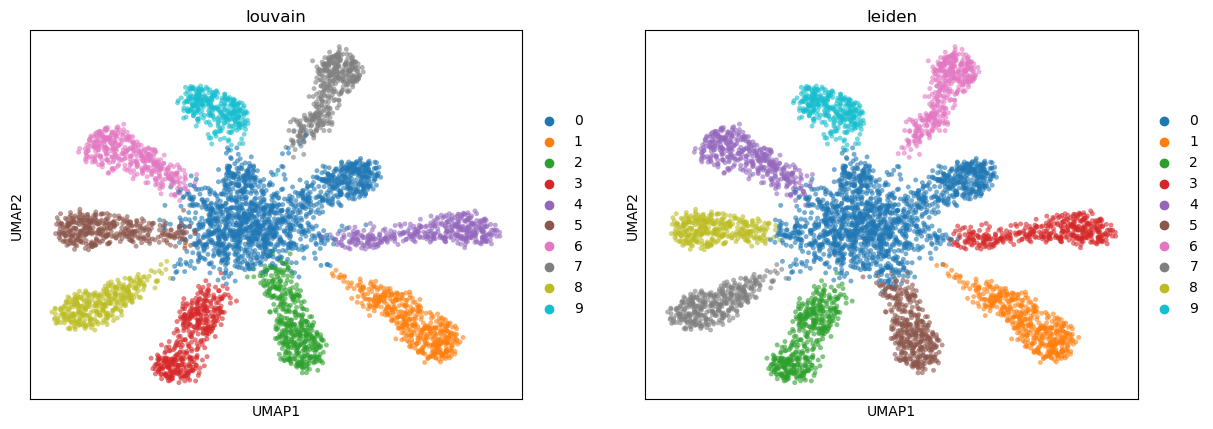

leiden: 0.49758991526897695 0.7512567201428503
louvain: 0.5367774624552458 0.7659735357838274


In [50]:
adata = sc.AnnData(data_ln_sqrt)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution=0.3, use_weights=True)
sc.tl.louvain(adata,resolution=0.3, use_weights=True)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain', 'leiden'], s=50, alpha=0.6, ncols=2)

leiden_group = np.array(adata.obs['leiden'].values).astype('int')
ari_leiden = metrics.adjusted_rand_score(leiden_group, data_group)
ami_leiden = metrics.adjusted_mutual_info_score(leiden_group, data_group)

louvain_group = np.array(adata.obs['louvain'].values).astype('int')
ari_louvain = metrics.adjusted_rand_score(louvain_group, data_group)
ami_louvain = metrics.adjusted_mutual_info_score(louvain_group, data_group)

print("leiden:",ari_leiden,ami_leiden)
print("louvain:",ari_louvain,ami_louvain)

In [51]:
embedding = DTNE(k_neighbors = 20) 
Y = embedding.fit_transform(data_ln_sqrt)
dtne_cluster = embedding.cluster_cells(n_clusters=n_groups)

ari_dtne = metrics.adjusted_rand_score(dtne_cluster, data_group)
ami_dtne = metrics.adjusted_mutual_info_score(dtne_cluster, data_group)
print("dtne:",ari_dtne,ami_dtne)

dtne: 0.5424292062977971 0.7691909037562127


In [52]:
agglo_instance = cluster.AgglomerativeClustering(n_clusters=n_groups).fit(data_ln_sqrt)
agglo_groups = agglo_instance.labels_
ari_agglo = metrics.adjusted_rand_score(agglo_groups, data_group)
ami_agglo = metrics.adjusted_mutual_info_score(agglo_groups, data_group)

print("hierarchical:",ari_agglo,ami_agglo)

hierarchical: 0.41365164391494563 0.6614707535180107


In [53]:
mp_op = mp.Multiscale_PHATE(random_state=0)
levels = mp_op.fit(data_ln_sqrt)
levels

Calculating Multiscale PHATE tree...
  Calculating PCA...
  Calculated PCA in 0.65 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 10.21 seconds.
  Setting epsilon to 0.2922
  Setting merge threshold to 0.0196
  Calculating condensation...
  Calculated condensation in 6.74 seconds.
Calculated Multiscale PHATE tree in 18.07 seconds.
Computing gradient...
Identifying salient levels of resolution...


[0, 11, 73, 83, 103, 110, 113, 120, 133, 137, 153, 158, 166, 177, 187]

In [54]:
mp_embedding, mp_clusters, mp_sizes = mp_op.transform(visualization_level = 0,cluster_level = 153)
set(mp_clusters)

{0, 2, 3, 8, 12, 15, 16, 36, 127}

In [55]:
ari_mp = metrics.adjusted_rand_score(mp_clusters, data_group)
ami_mp = metrics.adjusted_mutual_info_score(mp_clusters, data_group)
print("Multiscale PHATE:",ari_mp,ami_mp)

Multiscale PHATE: 0.31063020855393975 0.6654114929307365


In [80]:
data_ln_sqrt = pd.read_csv("data_ln_sqrt_scale02.csv",index_col=0)
data_group = pd.read_csv("group_scale02.csv",index_col=0).values.reshape(-1)
set(data_group)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Anaconda3\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


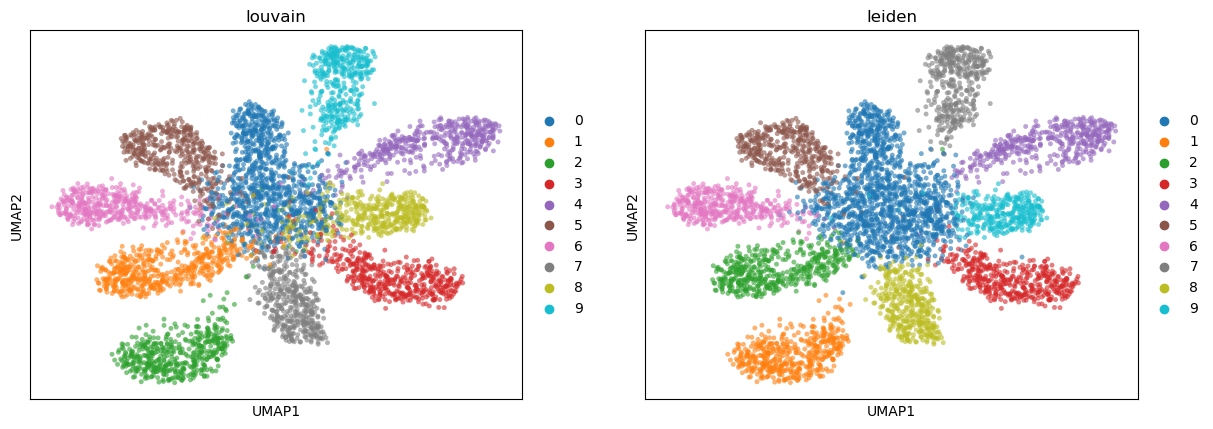

leiden: 0.5728359612364747 0.7686102314024469
louvain: 0.6725457678362959 0.7532383745758445


In [57]:
adata = sc.AnnData(data_ln_sqrt)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution=0.6, use_weights=True)
sc.tl.louvain(adata,resolution=0.6, use_weights=True)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain', 'leiden'], s=50, alpha=0.6, ncols=2)

leiden_group = np.array(adata.obs['leiden'].values).astype('int')
ari_leiden = metrics.adjusted_rand_score(leiden_group, data_group)
ami_leiden = metrics.adjusted_mutual_info_score(leiden_group, data_group)

louvain_group = np.array(adata.obs['louvain'].values).astype('int')
ari_louvain = metrics.adjusted_rand_score(louvain_group, data_group)
ami_louvain = metrics.adjusted_mutual_info_score(louvain_group, data_group)

print("leiden:",ari_leiden,ami_leiden)
print("louvain:",ari_louvain,ami_louvain)

In [89]:
embedding = DTNE(k_neighbors = 10,l1=2) 
Y = embedding.fit_transform(data_ln_sqrt)
dtne_cluster = embedding.cluster_cells(n_clusters=n_groups)

ari_dtne = metrics.adjusted_rand_score(dtne_cluster, data_group)
ami_dtne = metrics.adjusted_mutual_info_score(dtne_cluster, data_group)
print("dtne:",ari_dtne,ami_dtne)

dtne: 0.5514434639811174 0.7313622108806165


In [59]:
agglo_instance = cluster.AgglomerativeClustering(n_clusters=n_groups).fit(data_ln_sqrt)
agglo_groups = agglo_instance.labels_
ari_agglo = metrics.adjusted_rand_score(agglo_groups, data_group)
ami_agglo = metrics.adjusted_mutual_info_score(agglo_groups, data_group)

print("hierarchical:",ari_agglo,ami_agglo)

hierarchical: 0.33681375488072857 0.5549997057798907


In [60]:
mp_op = mp.Multiscale_PHATE(random_state=0)
levels = mp_op.fit(data_ln_sqrt)
levels

Calculating Multiscale PHATE tree...
  Calculating PCA...
  Calculated PCA in 0.59 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 10.19 seconds.
  Setting epsilon to 0.2779
  Setting merge threshold to 0.1893
  Calculating condensation...
  Calculated condensation in 26.54 seconds.
Calculated Multiscale PHATE tree in 37.61 seconds.
Computing gradient...
Identifying salient levels of resolution...


[0, 4, 117, 130, 142, 148, 151, 156, 161, 173, 193]

In [61]:
mp_embedding, mp_clusters, mp_sizes = mp_op.transform(visualization_level = 0,cluster_level = 156)
set(mp_clusters)

{0, 1, 2, 3, 4, 8, 11, 12, 15, 16, 32}

In [62]:
ari_mp = metrics.adjusted_rand_score(mp_clusters, data_group)
ami_mp = metrics.adjusted_mutual_info_score(mp_clusters, data_group)
print("Multiscale PHATE:",ari_mp,ami_mp)

Multiscale PHATE: 0.37457081771264755 0.6765487485487419


In [73]:
data_ln_sqrt = pd.read_csv("data_ln_sqrt_scale01.csv",index_col=0)
data_group = pd.read_csv("group_scale01.csv",index_col=0).values.reshape(-1)
set(data_group)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Anaconda3\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


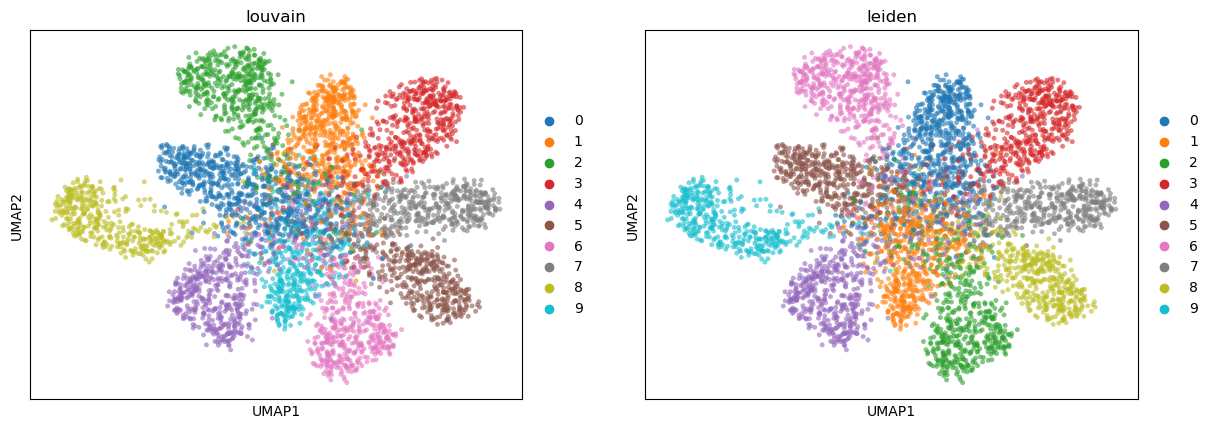

leiden: 0.6512586961757947 0.6667562220068046
louvain: 0.617621040865399 0.636847296796651


In [64]:
adata = sc.AnnData(data_ln_sqrt)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution=0.6, use_weights=True)
sc.tl.louvain(adata,resolution=0.6, use_weights=True)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain', 'leiden'], s=50, alpha=0.6, ncols=2)

leiden_group = np.array(adata.obs['leiden'].values).astype('int')
ari_leiden = metrics.adjusted_rand_score(leiden_group, data_group)
ami_leiden = metrics.adjusted_mutual_info_score(leiden_group, data_group)

louvain_group = np.array(adata.obs['louvain'].values).astype('int')
ari_louvain = metrics.adjusted_rand_score(louvain_group, data_group)
ami_louvain = metrics.adjusted_mutual_info_score(louvain_group, data_group)

print("leiden:",ari_leiden,ami_leiden)
print("louvain:",ari_louvain,ami_louvain)

In [79]:
embedding = DTNE(k_neighbors = 30,l1=2) 
Y = embedding.fit_transform(data_ln_sqrt)
dtne_cluster = embedding.cluster_cells(n_clusters=n_groups,cluster_method = "kmedoids")

ari_dtne = metrics.adjusted_rand_score(dtne_cluster, data_group)
ami_dtne = metrics.adjusted_mutual_info_score(dtne_cluster, data_group)
print("dtne:",ari_dtne,ami_dtne)

dtne: 0.41113046755293625 0.6889399427292333


In [66]:
agglo_instance = cluster.AgglomerativeClustering(n_clusters=n_groups).fit(data_ln_sqrt)
agglo_groups = agglo_instance.labels_
ari_agglo = metrics.adjusted_rand_score(agglo_groups, data_group)
ami_agglo = metrics.adjusted_mutual_info_score(agglo_groups, data_group)

print("hierarchical:",ari_agglo,ami_agglo)

hierarchical: 0.1316030253046993 0.3878176578117583


In [67]:
mp_op = mp.Multiscale_PHATE(random_state=0)
levels = mp_op.fit(data_ln_sqrt)
levels

Calculating Multiscale PHATE tree...
  Calculating PCA...
  Calculated PCA in 0.66 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 10.67 seconds.
  Setting epsilon to 0.1761
  Setting merge threshold to 0.1844
  Calculating condensation...
  Calculated condensation in 33.06 seconds.
Calculated Multiscale PHATE tree in 44.64 seconds.
Computing gradient...
Identifying salient levels of resolution...


[0, 1, 127, 137, 151, 169, 176, 179, 186, 202]

In [68]:
mp_embedding, mp_clusters, mp_sizes = mp_op.transform(visualization_level = 0,cluster_level = 151)
set(mp_clusters)

{0, 1, 2, 3, 6, 8, 11, 12, 18, 32, 44, 97, 362, 503}

In [69]:
ari_mp = metrics.adjusted_rand_score(mp_clusters, data_group)
ami_mp = metrics.adjusted_mutual_info_score(mp_clusters, data_group)
print("Multiscale PHATE:",ari_mp,ami_mp)

Multiscale PHATE: 0.194962410616026 0.5641976515722987


In [72]:
x = np.arange(0.1,1,0.1)
x

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [113]:
leiden_ari =  np.array([0.651, 0.573, 0.498, 0.499, 0.544, 0.612, 0.705, 0.746, 0.682])
leiden_ami =  np.array([0.667, 0.769, 0.752, 0.753, 0.771, 0.798, 0.832, 0.850, 0.828])
louvain_ari = np.array([0.617, 0.673, 0.537, 0.461, 0.548, 0.625, 0.739, 0.729, 0.678])
louvain_ami = np.array([0.637, 0.753, 0.766, 0.736, 0.773, 0.803, 0.846, 0.845, 0.827])

Agglo_ari   = np.array([0.131, 0.337, 0.414, 0.505, 0.574, 0.526, 0.540, 0.552, 0.529])
Agglo_ami   = np.array([0.388, 0.555, 0.661, 0.729, 0.761, 0.749, 0.764, 0.774, 0.769])

mp_ari      = np.array([0.195, 0.377, 0.311, 0.306, 0.506, 0.293, 0.308, 0.280, 0.527])
mp_ami      = np.array([0.564, 0.677, 0.665, 0.674, 0.752, 0.655, 0.663, 0.651, 0.761])

DTNE_ari    = np.array([0.411, 0.551, 0.542, 0.529, 0.580, 0.635, 0.706, 0.666, 0.726]) 
DTNE_ami    = np.array([0.689, 0.731, 0.769, 0.765, 0.786, 0.804, 0.830, 0.816, 0.843])

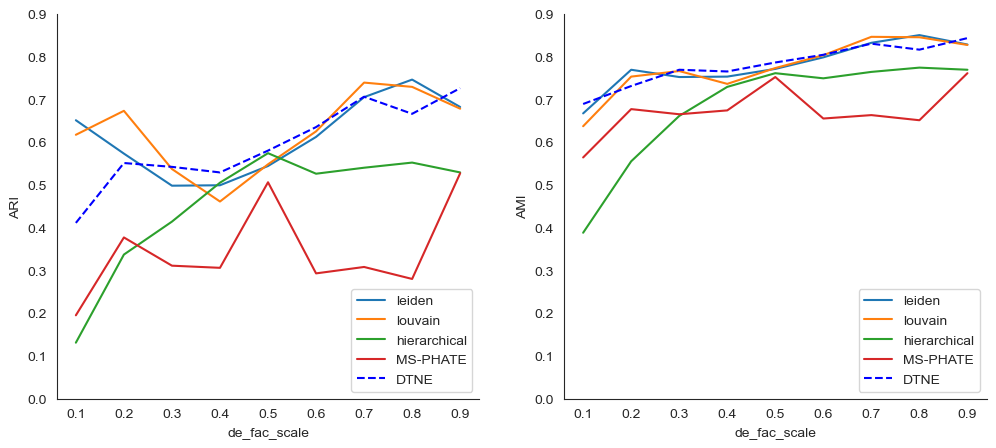

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # gridspec_kw={'width_ratios': [.5, .5]}
sns.set_style(style='white')

ax[0].plot(x, leiden_ari,  label="leiden")
ax[0].plot(x, louvain_ari, label="louvain")
ax[0].plot(x, Agglo_ari,   label="hierarchical")
ax[0].plot(x, mp_ari,   label="MS-PHATE")
ax[0].plot(x, DTNE_ari,  "--b", label="DTNE")
ax[0].legend(loc=4)
ax[0].set_ylim(0, 0.9)
ax[0].set_xlabel('de_fac_scale')
ax[0].set_ylabel('ARI')


ax[1].plot(x, leiden_ami,  label="leiden")
ax[1].plot(x, louvain_ami, label="louvain")
ax[1].plot(x, Agglo_ami,   label="hierarchical")
ax[1].plot(x, mp_ami,   label="MS-PHATE")
ax[1].plot(x, DTNE_ami,  "--b", label="DTNE")
ax[1].set_ylim(0, 0.9)
ax[1].legend(loc=4)
ax[1].set_xlabel('de_fac_scale')
ax[1].set_ylabel('AMI')

sns.despine(top=True,right=True,left=False,bottom=False,)

plt.savefig('./scprep_plot.png', format='png', dpi=1000)
plt.savefig('./scprep_plot.pdf', format='pdf', dpi=1000)

<Figure size 640x480 with 0 Axes>